In [108]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [70]:
df = pd.read_csv('Desktop/showwcase.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
session_id                300 non-null int64
customer_id               300 non-null int64
login_date                300 non-null object
projects_added            300 non-null bool
likes_given               300 non-null bool
comment_given             300 non-null bool
inactive_status           300 non-null bool
bug_occured               300 non-null bool
session_projects_added    300 non-null int64
session_likes_given       299 non-null float64
session_comments_given    300 non-null int64
inactive_duration         300 non-null int64
bugs_in_session           300 non-null int64
session_duration          300 non-null int64
dtypes: bool(5), float64(1), int64(7), object(1)
memory usage: 22.7+ KB


In [72]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,True,True,False,True,False,3,16.0,0,1405,0,1679


In [73]:
df.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
295,944212,40572,10/1/19,True,True,False,True,False,3,13.0,0,1174,0,2255
296,558332,87323,10/1/19,True,False,False,True,False,2,0.0,0,97,0,1692
297,643880,51243,10/1/19,True,False,False,True,False,2,0.0,0,906,0,1990
298,844518,23083,10/1/19,True,False,False,True,False,1,0.0,0,139,0,1113
299,933954,38459,10/1/19,True,False,False,False,False,1,0.0,0,0,0,306


In [74]:
df.isnull()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       1
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

In [76]:
new_df = df.dropna()

In [77]:
new_df.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

In [78]:
new_df.projects_added = new_df.projects_added.replace({True: 1, False: 0})

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [79]:
new_df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,0,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,1,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,1,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,1,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/19,1,True,False,True,False,3,16.0,0,1405,0,1679


In [80]:
new_df.likes_given = new_df.likes_given.replace({True: 1, False: 0})
new_df.comment_given = new_df.comment_given.replace({True: 1, False: 0})
new_df.inactive_status = new_df.inactive_status.replace({True: 1, False: 0})
new_df.bug_occured = new_df.bug_occured.replace({True: 1, False: 0})

In [81]:
new_df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/19,0,1,1,1,0,0,24.0,3,1146,0,1564
1,624241,24520,10/30/19,1,1,1,1,0,2,3.0,5,133,0,1766
2,111002,32047,10/30/19,1,1,1,1,0,1,5.0,5,1571,0,2230
3,545113,23404,10/30/19,1,1,1,0,0,1,10.0,21,0,0,633
4,750269,40235,10/30/19,1,1,0,1,0,3,16.0,0,1405,0,1679


In [82]:
from dateutil.parser import *

In [83]:
new_df["year"] = new_df.login_date.apply(lambda x: parse(x).year)
new_df["month"] = new_df.login_date.apply(lambda x: parse(x).month)
new_df["day"] = new_df.login_date.apply(lambda x: parse(x).day)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [84]:
new_df = new_df.drop(['session_id'],axis = 1) 

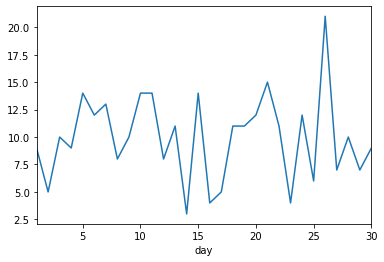

In [85]:
new_df.groupby('day').size().plot(kind = 'line')

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 16 columns):
customer_id               299 non-null int64
login_date                299 non-null object
projects_added            299 non-null int64
likes_given               299 non-null int64
comment_given             299 non-null int64
inactive_status           299 non-null int64
bug_occured               299 non-null int64
session_projects_added    299 non-null int64
session_likes_given       299 non-null float64
session_comments_given    299 non-null int64
inactive_duration         299 non-null int64
bugs_in_session           299 non-null int64
session_duration          299 non-null int64
year                      299 non-null int64
month                     299 non-null int64
day                       299 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 39.7+ KB


In [101]:

nday = new_df['day'].value_counts()

In [102]:
print(freq)
print(nday)

[30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1]
26    21
21    15
5     14
10    14
11    14
15    14
7     13
24    12
20    12
6     12
22    11
19    11
18    11
13    11
3     10
9     10
28    10
4      9
30     9
1      9
12     8
8      8
29     7
27     7
25     6
17     5
2      5
16     4
23     4
14     3
Name: day, dtype: int64


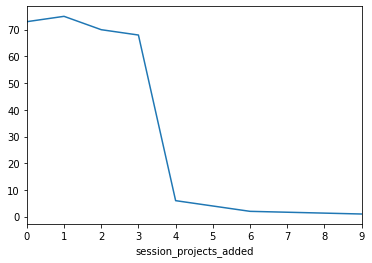

In [104]:
new_df.groupby('session_projects_added').size().plot(kind = 'line')

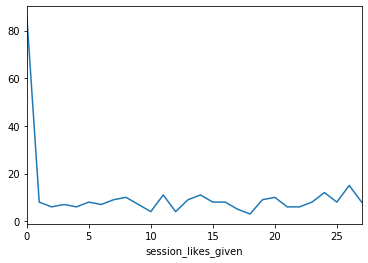

In [105]:
new_df.groupby('session_likes_given').size().plot(kind = 'line')

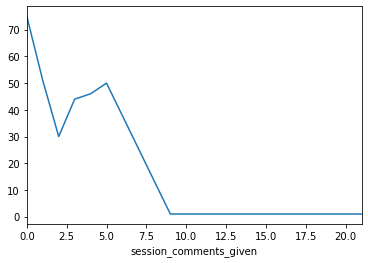

In [106]:
new_df.groupby('session_comments_given').size().plot(kind = 'line')

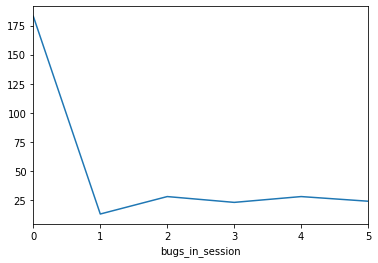

In [107]:
new_df.groupby('bugs_in_session').size().plot(kind = 'line')

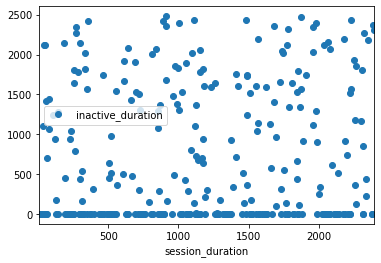

In [110]:
new_df.plot(x='session_duration', y='inactive_duration', style='o')